**Importing Packages**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Uploading Data set on to cloud**

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Real estate valuation data set (1).xlsx to Real estate valuation data set (1).xlsx
User uploaded file "Real estate valuation data set (1).xlsx" with length 32987 bytes


**Reading Data Set into Dataframe**

In [0]:
df = pd.read_excel('Real estate valuation data set (1).xlsx')

In [4]:
df.head()

,No,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Dropping the column which is not required

In [0]:
df.drop('No', axis = 1, inplace = True)

In [6]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


**Information about columns**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
Transaction date                       414 non-null float64
House age                              414 non-null float64
Distance to the nearest MRT station    414 non-null float64
Number of convenience stores           414 non-null int64
Latitude                               414 non-null float64
Longitude                              414 non-null float64
House price of unit area               414 non-null float64
dtypes: float64(6), int64(1)
memory usage: 22.7 KB


**Statistical Description of Data Set**

In [8]:
df.describe()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

**Spread of houses**

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

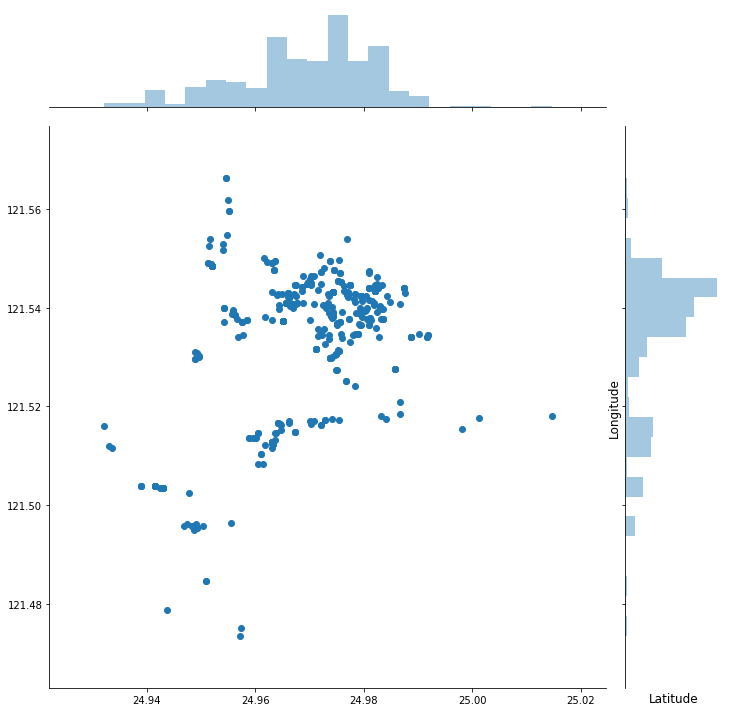

<function seaborn.utils.despine>

In [10]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.Latitude.values, y=df.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

**Separating features and target**

In [0]:
X = df.drop(['House price of unit area'], axis=1)
y = df['House price of unit area']

**Splitting into training and testing data**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


**Importing Linear Regression Model**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()

**Training**

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
print(lm.intercept_)

-15129.24062483695


In [0]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [19]:
coeff_df

,Coefficient
Transaction date,5.210137
House age,-0.275621
Distance to the nearest MRT station,-0.004598
Number of convenience stores,1.018863
Latitude,230.116623
Longitude,-8.732232


In [0]:
predictions = lm.predict(X_test)

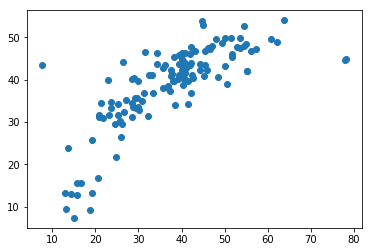

In [21]:
plt.scatter(y_test, predictions)

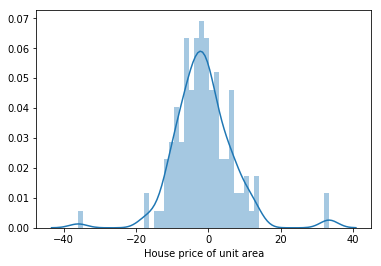

In [22]:
sns.distplot((y_test - predictions), bins=50)

In [0]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.057594378563277
MSE: 71.57636713662005
RMSE: 8.460281740971753


In [25]:
lm.score(X_test, y_test)

0.580010602620552

**Importing Gradient Boosting regression**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
gbr = GradientBoostingRegressor()

In [28]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
gbrPred = gbr.predict(X_test)

In [30]:
gbr.score(X_test, y_test)

0.6378949350692906

**Hyperparamater Tuning**

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'], 'learning_rate' : [0.01, 0.1, 0.3, 0.5], 'n_estimators' : [50, 100, 150, 200, 500]}

In [0]:
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

In [35]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.01, 0.1, 0.3, 0.5], 'n_estimators': [50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

**Best Parameters**

In [36]:
clf.best_params_

{'learning_rate': 0.3, 'loss': 'lad', 'n_estimators': 50}

**Training with tuned parameters**

In [0]:
gbr1 = GradientBoostingRegressor(learning_rate=0.3, loss='lad', n_estimators=50)

In [40]:
gbr1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
gbr1.score(X_test, y_test)

0.6886028946366769

In [0]:
gbrPred1 = gbr1.predict(X_test)

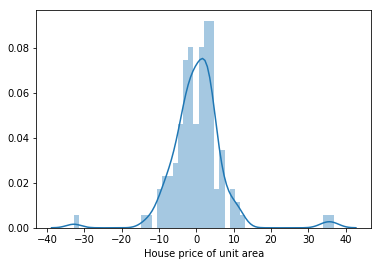

In [43]:
sns.distplot((y_test - gbrPred1), bins=50)

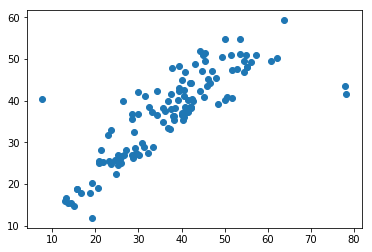

In [44]:
plt.scatter(y_test, gbrPred1)